In [1]:
# importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import os
from os import path

import matplotlib.pyplot as plt
from matplotlib import cm

import seaborn as sns
sns.set_style("whitegrid") # configuração de estilos dos gráficos do seaborn

% matplotlib inline

In [20]:
diretorioPA = 'simulacao_4.0.0_PA'
diretorioPB = 'simulacao_4.0.1_PB'

arquivoDados = 'dataTaxaMacFromMacLayer.csv'
colunas = ['tempo', 'node', 'taxaMAC', 'repeticao'] # como os dados estão organizados no arquivo


In [21]:
# Cada simulacao executada 100 vezes
# como temos três modos de interferência: 0, 1 e 2
# então foram executadas 300 repeticoes no total.

def inferir_modeInterferencia_de_repeticao(item):
    if item <= 100:
        return 0
    elif item <= 200:
        return 1
    elif item <= 300:
        return 2
    else:
        raise Exception('Parâmetro não esperado!')

In [22]:
arquivo = path.join(diretorioPA, arquivoDados)
dfTaxaMacPA = pd.read_csv(arquivo,delimiter='|',names=colunas)

In [23]:
dfTaxaMacPA['InterfModel'] = dfTaxaMacPA['repeticao'].apply(inferir_modeInterferencia_de_repeticao)

In [24]:
dfTaxaMacPA.head()

,tempo,node,taxaMAC,repeticao,InterfModel
0,1.245767,4,60,1,0
1,1.273110,5,40,1,0
2,1.468203,3,60,1,0
3,1.477734,1,20,1,0
4,1.483515,5,100,1,0


In [31]:
def calcula_porcentagem_taxaMAC(dados, repeticao = 0):
    if repeticao != 0:
        dados = dados[dados["repeticao"] == repeticao]
    df = dados.groupby(by="taxaMAC",as_index=False).count()
    total = df["node"].sum()
    resultado = pd.DataFrame()
    resultado["freq_absoluta"] = df["node"]
    resultado["freq_relativa"] = df["node"] / total
    return resultado

In [32]:
df = dfTaxaMacPA[dfTaxaMacPA['InterfModel'] != 2]
dfOcorrenciasTaxaMacPA = calcula_porcentagem_taxaMAC(df)

In [33]:
dfOcorrenciasTaxaMacPA

,freq_absoluta,freq_relativa
0,2371,0.002494
1,9040,0.009511
2,28975,0.030484
3,84438,0.088835
4,205320,0.216012
5,620358,0.652664


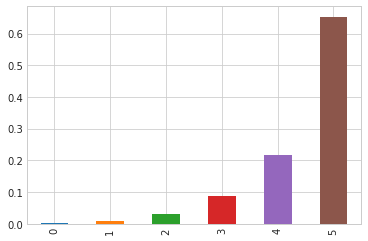

In [35]:
dfOcorrenciasTaxaMacPA['freq_relativa'].plot(kind='bar')